In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [88]:
# REading file and getting to know the data
working_file_path='M2-1 Working on thesis paper.xlsx'
df = pd.read_excel(working_file_path,sheet_name='All Data')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3406 entries, 0 to 3405
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   1           3406 non-null   int64  
 1   PRICE       3406 non-null   object 
 2   BRANDNAME   3406 non-null   object 
 3   MAKEYEAR    3386 non-null   float64
 4   FUEL        3406 non-null   object 
 5   KM          2811 non-null   object 
 6   BODY        3406 non-null   object 
 7   GEARBOX     3406 non-null   object 
 8   DRIVE       3406 non-null   object 
 9   COLOR       3406 non-null   object 
 10  POSTDATE    3405 non-null   object 
 11  MILEAGE     1676 non-null   object 
 12  ENGINE(CC)  2802 non-null   float64
 13  KM_INT      2394 non-null   float64
 14  PRICE_NEW   3406 non-null   int64  
dtypes: float64(3), int64(2), object(10)
memory usage: 399.3+ KB


In [89]:
# copying the data frame to an updated data frame and dropiing unnecessary data row with null value in any column


df1=df
df1=df1.drop('MILEAGE', axis=1)
df1=df1.drop('KM', axis=1)
df1=df1.drop('PRICE', axis=1)

df1.dropna(inplace=True)

# Instead of directly updateing the current dataframe we first copy and use the copy so original is saved for future reference
dfNew=df1.copy();


# df1.info()
# Display or use the filtered DataFrame as needed
df2 = df.loc[:, ["MAKEYEAR", "KM_INT","PRICE_NEW","BRANDNAME","FUEL","BODY","GEARBOX","DRIVE","COLOR"]]

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3406 entries, 0 to 3405
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MAKEYEAR   3386 non-null   float64
 1   KM_INT     2394 non-null   float64
 2   PRICE_NEW  3406 non-null   int64  
 3   BRANDNAME  3406 non-null   object 
 4   FUEL       3406 non-null   object 
 5   BODY       3406 non-null   object 
 6   GEARBOX    3406 non-null   object 
 7   DRIVE      3406 non-null   object 
 8   COLOR      3406 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 239.6+ KB


In [90]:
# coding all brandname with data less than 50 to Other or REMOVING ALL OTHER BRANDS


valueCount=df1.value_counts('BRANDNAME')
# print(valueCount)
brands_to_keep = valueCount[valueCount > 50].index.tolist()
#THIS CODE HELPS TO CODE BRAND WITH VALUE LESS THAN 50 TO OTHER BRAND
# dfNew['BRANDNAME'] = dfNew['BRANDNAME'].apply(lambda x: x if x in brands_to_keep else 'Other Brand')
#//THIS CODE REMOVES ALL DATA WITH BRAND COUNT  LESS THAN 50
dfNew= dfNew[dfNew['BRANDNAME'].isin(brands_to_keep)]
print(len(dfNew))


2045


In [91]:
# Using MAke Year and Post date we convert the data to age of vehicle so we can use it as a numeric variable
# WE CALCULATE AGE OF CAR BY SUBTRACTIING MAKE YEAR FROM POST YEAR. SINCE THERE ARE POST DATE IN EITHER DATE FORMAT OR AS STRING SO WE USE FOLLOWING CODE TO EXTRACT YEAR FROM BOTH TYPE OF DATE
dfNew['POSTYEAR'] = dfNew['POSTDATE'].str[:4]
empty_indices = dfNew[dfNew['POSTYEAR'].isnull()].index.tolist()
dfNew.loc[empty_indices, 'POSTYEAR'] = pd.to_datetime(dfNew.loc[empty_indices, 'POSTDATE']).dt.year


# since regression is not possible to include in makeyear so we calculate age of vehicle to make it a variable and not a categorical varaible

dfNew['AGE'] = (dfNew['POSTYEAR'].astype(float)  - dfNew['MAKEYEAR'].astype(float)).astype(int) ;
print(dfNew.value_counts('AGE'))


AGE
7     224
6     184
5     179
9     158
8     147
13    134
2     119
4     117
14    112
10    102
3      85
15     73
11     66
12     65
16     63
1      44
17     29
18     29
19     22
20     14
21     13
23     13
22      8
27      6
0       6
24      5
31      4
26      3
32      3
25      2
42      2
33      2
30      2
28      2
29      1
36      1
41      1
44      1
49      1
53      1
55      1
57      1
Name: count, dtype: int64


In [92]:
#Coding all Body type to specific set of data i.e. Compact SUV, Suv and Jeep SUV to SUV and Small Hatchback, Medium hatchback to hatchback 
# We 
valueCount=dfNew.value_counts('BODY')
# print(valueCount)
dfNew['BODY'] = dfNew['BODY'].replace({r'.*SUV.*': 'SUV', r'.*Hatchback.*': 'Hatchback'}, regex=True, inplace=False)
#Removing  row of data with count of body type  less than 50
dfNew = dfNew[dfNew['BODY'].map(dfNew['BODY'].value_counts()) >= 50]
print(dfNew.value_counts('BODY'))



BODY
Hatchback    849
SUV          763
Sedan        223
Pickup       143
Van           67
Name: count, dtype: int64


In [93]:
# Converting Individual Engine data to range so we can treat it to a categorical varaibles

valueCount=dfNew.value_counts('ENGINE(CC)')
dfNew.value_counts('ENGINE(CC)').to_csv('Only Engine Individually.csv')
bins = [0, 1000, 1500, 2000, 2500, 2900, float('inf')]
labels = ['0-1000(cc)', '1001-1500(cc)', '1501-2000(cc)', '2001-2500(cc)', '2501-2900(cc)', '2901-above(cc)']
dfNew['ENGINERANGE'] = pd.cut(dfNew['ENGINE(CC)'], bins=bins, labels=labels, right=True)

print(dfNew.value_counts('ENGINERANGE'))


ENGINERANGE
1001-1500(cc)     1102
0-1000(cc)         359
1501-2000(cc)      309
2001-2500(cc)      133
2501-2900(cc)       75
2901-above(cc)      67
Name: count, dtype: int64


In [94]:
# coding all Color with data less than 100 to Other and leaving rest as it is to check impact of color

valueCount=df1.value_counts('COLOR')
# print(valueCount)
colorsToKeep = valueCount[valueCount > 50].index.tolist()
dfNew['COLOR'] = dfNew['COLOR'].replace('Other', 'Other Colors')
dfNew['COLOR'] = dfNew['COLOR'].replace('white', 'White')
dfNew['COLOR'] = dfNew['COLOR'].apply(lambda x: x if x in colorsToKeep else 'Other Colors')

print(valueCount)







COLOR
Silver    642
Gray      392
White     320
Red       177
Blue      155
Other     142
white     139
Black      75
Brown      75
Maroon     67
Green      39
Golden     38
Beige      35
blue       26
Yellow     16
black      16
Orange     15
WHITE      10
BLUE        4
Army        4
beige       1
WHite       1
BLACK       1
red         1
Name: count, dtype: int64


In [95]:
dfNew = dfNew.loc[:, ["PRICE_NEW","BRANDNAME", "KM_INT","FUEL","BODY","GEARBOX","DRIVE","COLOR","AGE","ENGINERANGE"]]
dfNew.to_csv('Raw Data Final.csv')

In [96]:
# Now make two copies of dataframe and use them to make regerssion for normal data regression and log of data to improve data quality

normalDf=dfNew.copy();
#to use log of data
logDf=dfNew.copy();

In [99]:
#Creating dummy variables for brand , color and body type,
# Also creating dummy variables for binary data like Fuel, Drive, Gearbox

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
normalDf['FUEL'] = label_encoder.fit_transform(normalDf['FUEL'])
normalDf['DRIVE'] = label_encoder.fit_transform(normalDf['DRIVE'])
normalDf['GEARBOX'] = label_encoder.fit_transform(normalDf['GEARBOX'])
normalDf=normalDf.join(pd.get_dummies(normalDf.BRANDNAME)).drop(['BRANDNAME'], axis=1);
if 'COLOR' in normalDf.columns:
    normalDf=normalDf.join(pd.get_dummies(normalDf.COLOR)).drop(['COLOR'], axis=1)  ;
normalDf=normalDf.join(pd.get_dummies(normalDf.BODY)).drop(['BODY'], axis=1);
normalDf=normalDf.join(pd.get_dummies(normalDf.ENGINERANGE)).drop(['ENGINERANGE'], axis=1);
normalDf = normalDf.astype(int)



In [100]:
#With this all data has been added as dummies or integers and the Data set is ready to check correlation and finally run regression
# normalDf.info()

In [108]:
# checking model summary for pvalue 
# This is done to check the variables to be used as a predictor
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd


dfNewCopy = normalDf.copy()
y = dfNewCopy['PRICE_NEW']

dfNewCopy.head()
# dfNewCopy = normalDf.drop(columns=normalDf.columns[0])

X=dfNewCopy.drop(['PRICE_NEW'],axis=1)
X = sm.add_constant(X)


# # print(X.info())
model = sm.OLS(y.astype(float), X.astype(float)).fit()
# print(model.fit())

# print(len(X))
# print(len(y))


# for column in dfNewCopy.columns:
#     print(f"{column}: {dfNewCopy[column].dtype}")

# print(dfNewCopy.dtypes)
# # Display the summary
print(model.summary())

# # Extracting p-values from the summary
# p_values = summary.tables[1]['P>|t|']
# print("P-values:")
# print(p_values)


                            OLS Regression Results                            
Dep. Variable:              PRICE_NEW   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     61.27
Date:                Sat, 02 Mar 2024   Prob (F-statistic):          1.10e-263
Time:                        22:51:16   Log-Likelihood:                -32177.
No. Observations:                2045   AIC:                         6.442e+04
Df Residuals:                    2013   BIC:                         6.460e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           3.249e+06   1.06e+05     30.

In [109]:
column_names = X.columns

# Extract the coefficients from the model
coefficients = model.params

# Create a string representation of the regression equation
equation = 'Y = {:.2f}'.format(coefficients['const'])

for i, coefficient in enumerate(coefficients[1:], start=1):
    equation += ' + {:.2f} * {}'.format(coefficient, column_names[i-1])

# Display the equation
print(equation)

Y = 3248973.31 + -6.14 * const + -614453.53 * KM_INT + -286924.50 * FUEL + 474361.47 * GEARBOX + -149652.48 * DRIVE + -113275.95 * AGE + 470345.33 * Ford + 998706.68 * Hyundai + -1072186.45 * Kia + 333155.43 * Mahindra + 423604.09 * Maruti Suzuki + -419079.28 * Nissan + -952804.48 * Renault + 2697657.84 * Tata + 882850.10 * Toyota + 117036.83 * Volkswagen + 410898.39 * Black + 234059.59 * Blue + 387502.84 * Brown + 779149.48 * Gray + 231941.10 * Maroon + 240937.32 * Other Colors + 426533.49 * Red + 420914.26 * Silver + 1022767.61 * White + -402609.65 * Hatchback + 1544560.83 * Pickup + 742800.56 * SUV + 341453.96 * Sedan + -806627.79 * Van + -648734.25 * 0-1000(cc) + -128151.15 * 1001-1500(cc) + 469315.24 * 1501-2000(cc) + 1631471.21 * 2001-2500(cc) + 2731700.05 * 2501-2900(cc)


In [ ]:
#Running Linear regression 

from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
normalDf.head();
dfNewCopy = normalDf.iloc[1:, :].copy()
# dfNewCopy = normalDf.drop(columns=normalDf.columns[0])

y=dfNewCopy['PRICE_NEW'];
X=dfNewCopy.drop(['PRICE_NEW'],axis=1);



X = X.iloc[1:, :]
y = y.iloc[1:]
# Now splitting training  Data and Test data (We use 80% of Data as training data and 20% data is Test data)

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)

# print(len(y_test))

model=LinearRegression();
model.fit(X_train,y_train)
r2=model.score(X_test,y_test)
y_pred = model.predict(X_test)

#Now Predicting for test data

print("R2 score is : ",r2)
# Calculate adjusted R^2
# adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))
# print('Adjusted r2 is : ',adjusted_r2)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', metrics.root_mean_squared_error(y_test, y_pred))

#computing r2
# y = y.values.reshape(-1, 1)
# y_pred = y_pred.values.reshape(-1, 1)
n = X_test.shape[0]
k = X_test.shape[1]



print("***********Running a Random Forest Regression***********")

#running a random forest Regressor to boost performance
from sklearn.ensemble import RandomForestRegressor
forest= RandomForestRegressor()
forest.fit(X_train, y_train)
newr2=forest.score(X_test,y_test)
adjusted_forest_r2 = 1 - ((1 - newr2) * (n - 1) / (n - k - 1))
print("The new R2 score after Random Forest Regression is : ",newr2)
print("The new Adjusted R2 score after Random Forest Regression is : ",adjusted_forest_r2)

R2 score is :  0.4780650324983663


NameError: name 'n' is not defined

In [ ]:
# Working with log of data after this
#************************Start******************
print('********************Working in log model*********')

********************Working in log model*********


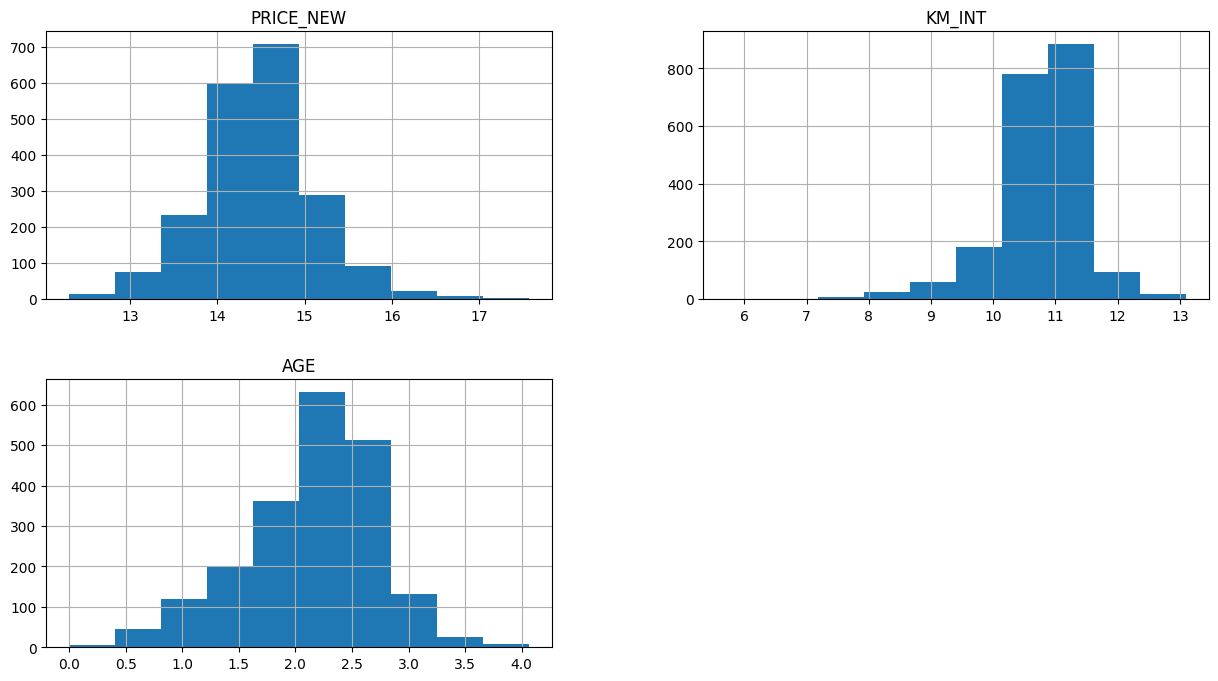

In [ ]:
# Since the above histogram does not look to be right or left squed and are not a bell shaped curve so we take logaarithm value
logDf['PRICE_NEW'] =np.log(logDf['PRICE_NEW']+1);
logDf['KM_INT'] =np.log(logDf['KM_INT']+1);
logDf['AGE'] =np.log(logDf['AGE']+1);
logDf.hist(figsize=(15,8));


In [ ]:
#Creating dummy variables for brand , color and body type,
# Also creating dummy variables for binary data like Fuel, Drive, Gearbox

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
logDf['FUEL'] = label_encoder.fit_transform(logDf['FUEL'])
logDf['DRIVE'] = label_encoder.fit_transform(logDf['DRIVE'])
logDf['GEARBOX'] = label_encoder.fit_transform(logDf['GEARBOX'])
logDf=logDf.join(pd.get_dummies(logDf.BRANDNAME)).drop(['BRANDNAME'], axis=1);
if 'COLOR' in logDf.columns:
    logDf=logDf.join(pd.get_dummies(logDf.COLOR)).drop(['COLOR'], axis=1)
logDf=logDf.join(pd.get_dummies(logDf.BODY)).drop(['BODY'], axis=1);
logDf=logDf.join(pd.get_dummies(logDf.ENGINERANGE)).drop(['ENGINERANGE'], axis=1);

In [ ]:
# #Plot and see the correlation of various variables with Log of data
# plt.figure(figsize=(15,8))
# logNumericalData=logDf[["PRICE_NEW","ENGINE(CC)","KM_INT","MAKEYEAR"]]
# print(logNumericalData.corr());
# sns.heatmap(logNumericalData.corr(),annot=True,cmap="YlGnBu");

In [ ]:
#Running Linear regression 

from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

logDfCopy = logDf.copy()

y=logDfCopy['PRICE_NEW'];

# Now splitting training  Data and Test data (We use 80% of Data as training data and 20% data is Test data)
X=logDfCopy.drop(['PRICE_NEW'],axis=1);

X = X.iloc[1:, :]
y = y.iloc[1:]
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)

# print(len(y_test))

model=LinearRegression();
model.fit(X_train,y_train)
r2=model.score(X_test,y_test)
y_pred = model.predict(X_test)

#Now Predicting for test data

print("R2 score is : ",r2)
# Calculate adjusted R^2
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))
print('Adjusted r2 is : ',adjusted_r2)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', metrics.root_mean_squared_error(y_test, y_pred))

#computing r2
# y = y.values.reshape(-1, 1)
# y_pred = y_pred.values.reshape(-1, 1)
n = X_test.shape[0]
k = X_test.shape[1]



print("***********Running a Random Forest Regression***********")

#running a random forest Regressor to boost performance
from sklearn.ensemble import RandomForestRegressor
forest= RandomForestRegressor()
forest.fit(X_train, y_train)
newr2=forest.score(X_test,y_test)
adjusted_forest_r2 = 1 - ((1 - newr2) * (n - 1) / (n - k - 1))
print("The new R2 score after Random Forest Regression is : ",newr2)
print("The new Adjusted R2 score after Random Forest Regression is : ",adjusted_forest_r2)

R2 score is :  0.7431733626553294
Adjusted r2 is :  0.7190743484272772
Mean Absolute Error: 0.24398158884401355
Root Mean Squared Error: 0.33200662903798633
***********Running a Random Forest Regression***********
The new R2 score after Random Forest Regression is :  0.7918287685757104
The new Adjusted R2 score after Random Forest Regression is :  0.7722952750104285


https://www.youtube.com/watch?v=Wqmtf9SA_kk&ab_channel=NeuralNine
https://www.youtube.com/watch?v=RQ3YuekiBqQ&ab_channel=BryanNelson
https://www.youtube.com/watch?v=xu0prYu5e-c&ab_channel=AliNasserEddine
https://www.youtube.com/watch?v=Jfmb4agrvLU&ab_channel=DataTrek
https://www.youtube.com/watch?v=tPykSMHpgHw&ab_channel=dataminingincae